### A simple neural network written in Keras to classify the IRIS data

In [ ]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [ ]:
iris_data = load_iris() # load the iris dataset

In [ ]:
data = pd.DataFrame(data= np.c_[iris_data['data'], iris_data['target']],
                     columns= iris_data['feature_names'] + ['target'])

In [ ]:
data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


In [ ]:
# importing packages
import seaborn
import matplotlib.pyplot as plt

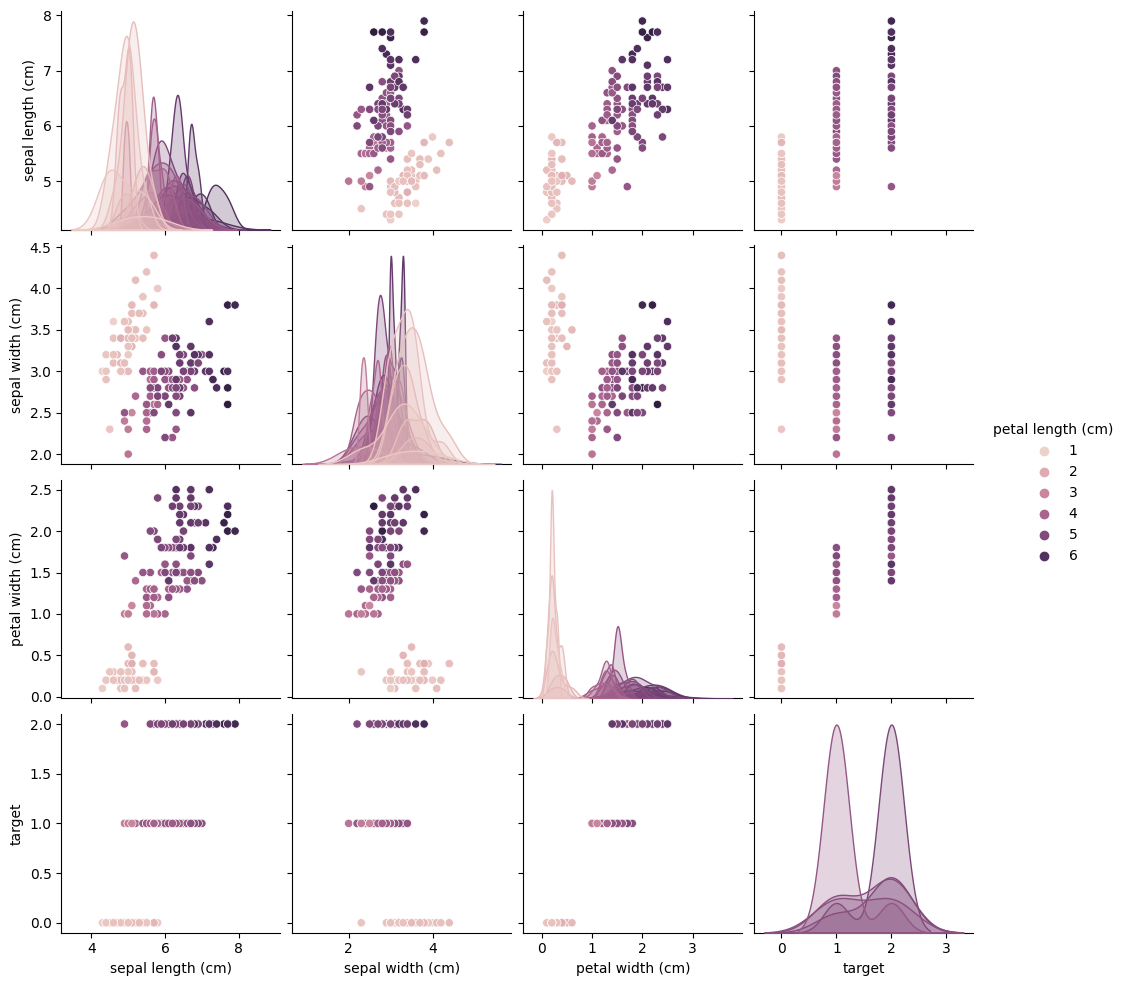

In [ ]:
# pairplot with hue
seaborn.pairplot(data, hue ='petal length (cm)')
# to show
plt.show()

In [ ]:
print('Example data: ')
print(iris_data.data[:5])
print('Example labels: ')
print(iris_data.target[:5])

x = iris_data.data
y_ = iris_data.target.reshape(-1, 1) # Convert data to a single column

Example data: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Example labels: 
[0 0 0 0 0]


In [ ]:
# One Hot encode the class labels
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)
#print(y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Split the data for training and testing
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20)

In [ ]:
# Build the model

model = Sequential()

model.add(Dense(10, input_shape=(4,), activation='relu', name='fc1'))
model.add(Dense(10, activation='relu', name='fc2'))
model.add(Dense(3, activation='softmax', name='output'))

In [ ]:
# Adam optimizer with learning rate of 0.001
optimizer = Adam(lr=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print('Neural Network Model Summary: ')
print(model.summary())

Neural Network Model Summary: 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc1 (Dense)                 (None, 10)                50        
                                                                 
 fc2 (Dense)                 (None, 10)                110       
                                                                 
 output (Dense)              (None, 3)                 33        
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
# Train the model
model.fit(train_x, train_y, verbose=2, batch_size=5, epochs=200)

Epoch 1/200
24/24 - 1s - loss: 1.3543 - accuracy: 0.0500 - 1s/epoch - 54ms/step
Epoch 2/200
24/24 - 0s - loss: 1.0803 - accuracy: 0.4333 - 87ms/epoch - 4ms/step
Epoch 3/200
24/24 - 0s - loss: 0.8987 - accuracy: 0.6833 - 81ms/epoch - 3ms/step
Epoch 4/200
24/24 - 0s - loss: 0.7594 - accuracy: 0.7083 - 71ms/epoch - 3ms/step
Epoch 5/200
24/24 - 0s - loss: 0.6556 - accuracy: 0.7250 - 79ms/epoch - 3ms/step
Epoch 6/200
24/24 - 0s - loss: 0.5778 - accuracy: 0.8083 - 77ms/epoch - 3ms/step
Epoch 7/200
24/24 - 0s - loss: 0.5233 - accuracy: 0.8583 - 65ms/epoch - 3ms/step
Epoch 8/200
24/24 - 0s - loss: 0.4841 - accuracy: 0.8583 - 77ms/epoch - 3ms/step
Epoch 9/200
24/24 - 0s - loss: 0.4484 - accuracy: 0.8750 - 74ms/epoch - 3ms/step
Epoch 10/200
24/24 - 0s - loss: 0.4237 - accuracy: 0.8583 - 63ms/epoch - 3ms/step
Epoch 11/200
24/24 - 0s - loss: 0.4002 - accuracy: 0.9250 - 41ms/epoch - 2ms/step
Epoch 12/200
24/24 - 0s - loss: 0.3799 - accuracy: 0.9167 - 47ms/epoch - 2ms/step
Epoch 13/200
24/24 - 0s - 

In [ ]:
# Test on unseen data

results = model.evaluate(test_x, test_y)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

1/1 [==============================] - 0s 176ms/step - loss: 0.1857 - accuracy: 0.9000
Final test set loss: 0.185736
Final test set accuracy: 0.900000
